## <center><u>Basketball Team Analysis</u></center>
- **DOMAIN:** Sports
- **CONTEXT:** Company X manages the men's top professional basketball division of the American league system.
The dataset contains information on all the teams that have participated in all the past tournaments. It has data
about how many baskets each team scored, conceded, how many times they came within the first 2 positions,
how many tournaments they have qualified, their best position in the past, etc.
- **DATA DESCRIPTION:** Basketball.csv - The data set contains information on all the teams so far participated in
all the past tournaments.
- **ATTRIBUTE INFORMATION:**
 1. `Team`: Team’s name
 2. `Tournament`: Number of played tournaments.
 3. `Score`: Team’s score so far.
 4. `PlayedGames`: Games played by the team so far.
 5. `WonGames`: Games won by the team so far.
 6. `DrawnGames`: Games drawn by the team so far.
 7. `LostGames`: Games lost by the team so far.
 8. `BasketScored`: Basket scored by the team so far.
 9. `BasketGiven`: Basket scored against the team so far.
 10. `TournamentChampion`: How many times the team was a champion of the tournaments so far.
 11. `Runner-up`: How many times the team was a runners-up of the tournaments so far.
 12. `TeamLaunch`: Year the team was launched on professional basketball.
 13. `HighestPositionHeld`: Highest position held by the team amongst all the tournaments played.
- **PROJECT OBJECTIVE:** Company’s management wants to invest on proposal on managing some of the best
teams in the league. The analytics department has been assigned with a task of creating a report on the
performance shown by the teams. Some of the older teams are already in contract with competitors. Hence
Company X wants to understand which teams they can approach which will be a deal win for them.
___
### Imports and Configurations

In [1]:
# Import all the libraries needed to load the dataset and visualize it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure for any default setting of any library
%matplotlib inline
sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True)

**Comments**
- **``%matplotlib inline``** sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline without needing to call plt.show() every time a data is plotted.
- Set few of the Seaborn's asthetic parameters

### Load the Dataset

In [3]:
# Load the dataset into a Pandas dataframe called basketball
basketball = pd.read_csv('DS - Part2 - Basketball.csv')

In [4]:
# Check the head of the dataset
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [5]:
# Check the tail of the dataset
basketball.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


**Comments**: To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.

### Inspect the Dataset

In [6]:
# Get the shape and size of the dataset
basketball.shape

(61, 13)

In [7]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
Team                   61 non-null object
Tournament             61 non-null int64
Score                  61 non-null object
PlayedGames            61 non-null object
WonGames               61 non-null object
DrawnGames             61 non-null object
LostGames              61 non-null object
BasketScored           61 non-null object
BasketGiven            61 non-null object
TournamentChampion     61 non-null object
Runner-up              61 non-null object
TeamLaunch             61 non-null object
HighestPositionHeld    61 non-null int64
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


**Observations**
- This dataset contains **61** observations with **13** independant attribues
- All columns are of type string where as only _Tournament_ and _HighestPositionHeld_ are of type integer
- There are **No null/missing values** present in the dataset

### Data Cleaning
We can't draw proper conclusion and derive relationships with Exploratory Data Analysis (EDA) when some of the data is missing/encoded. So we have to find a solution to clean it up before taking it into consideration.

The easiest option could be to eliminate all those team's record with null or missing values present in any of the attributes, but in this way we would end up eliminating a lot of other important data.

Analysing the dataset, it implies that all of the attributes are quantitative except for the TeamLaunch, which represents a year.
So, our approach is to impute 0 in place of all the null or missing fields. TeamLaunch attribute also needs to be cleaned to contain only a particular year of launch.

In [8]:
# Replacae all '-' with 0
basketball.replace(to_replace='-', value=0, inplace=True)

# Correction for TeamLaunch column
basketball['TeamLaunch'] = basketball['TeamLaunch'].apply(lambda year: str(year)[:4])

In [9]:
# Convert the datatype of all columns to integer except for TeamName
columns = basketball.columns
basketball[columns[1:]] = basketball[columns[1:]].astype('int64')
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
Team                   61 non-null object
Tournament             61 non-null int64
Score                  61 non-null int64
PlayedGames            61 non-null int64
WonGames               61 non-null int64
DrawnGames             61 non-null int64
LostGames              61 non-null int64
BasketScored           61 non-null int64
BasketGiven            61 non-null int64
TournamentChampion     61 non-null int64
Runner-up              61 non-null int64
TeamLaunch             61 non-null int64
HighestPositionHeld    61 non-null int64
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


In [10]:
# Describe the dataset with various summary and statistics
basketball.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,1958.918033,7.081967
std,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,27.484114,5.276663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1929.000000,1.000000
25%,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,1935.000000,3.000000
50%,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,1951.000000,6.000000
75%,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,1978.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,2017.000000,20.000000


**Comments**
>- This **".describe()"** function generates descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset's distribution, excluding ``NaN`` values
>- **``Central Tendency``** is represented by indices *min, 25%, 50%, 75% and max*.
>- 25% is also known as **``First Quartile (Q1)``**, 50% as Second Quartile or **``Median (Q2)``** and 75% as **``Third Quartile (Q3)``**

**Observations**
>- 9 attributes have a minimum value of 0 present in the Central Tendency chart, hence the distributions contains one or more zero values.

### Additional Features
For the sake of better understanding, let's derive following features from some of the existing ones.

- `CancelledGames`: Number of Games played but no result have been declared. These are the games could have cancelled or withdrawn without declaring any result such as won/lost/drawn.
- `WinningPercentage`: Percentages of games owned by the team.
- `LoosingPercentage`: Percentages of games lost by the team.
- `WinningRatio`: Ratio of games won to that of lost
- `BasketRatio`: Ratio of baskets scored to that of given

In [11]:
# Add CancelledGames features
# basketball.drop('CancelledGames', axis=1, inplace=True)
n_cancelled = basketball['PlayedGames'] - (basketball['DrawnGames'] + basketball['WonGames'] + basketball['LostGames'])
basketball.insert(loc=7, column='CancelledGames', value=n_cancelled)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,0,4631,3700,8,7,1929,1


In [12]:
# Add WinningPercentage features
# basketbcall.drop('WinningPercentage', axis=1, inplace=True)
won_pct = basketball['WonGames'] / basketball['PlayedGames']
basketball.insert(loc=5, column='WinningPercentage', value=won_pct)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0,4631,3700,8,7,1929,1


In [13]:
# Add LoosingPercentage features
# basketball.drop('LoosingPercentage', axis=1, inplace=True)
won_pct = basketball['LostGames'] / basketball['PlayedGames']
basketball.insert(loc=8, column='LoosingPercentage', value=won_pct)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,0,4631,3700,8,7,1929,1


In [14]:
# Add WinningRatio features
# basketball.drop('WinningRatio', axis=1, inplace=True)
won_pct = basketball['WonGames'] / basketball['LostGames']
basketball.insert(loc=9, column='WinningRatio', value=won_pct)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,WinningRatio,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,8,7,1929,1


In [15]:
# Add BasketRatio features
# basketball.drop('BasketRatio', axis=1, inplace=True)
won_pct = basketball['BasketScored'] / basketball['BasketGiven']
basketball.insert(loc=13, column='BasketRatio', value=won_pct)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,WinningRatio,CancelledGames,BasketScored,BasketGiven,BasketRatio,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,1.893949,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,1.894669,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,1.370202,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,1.267801,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,1.251622,8,7,1929,1


### Data Visualization
Exploratory Data Analysis(EDA) is incomplete without Data Visualization. It's a pictorial representation of data using beautiful graphs. It enables us to see analytics presented visually which helps in grasping unnoticed information or identify new patterns.

#### Univariate Analysis - To check individual distribution- Skewness

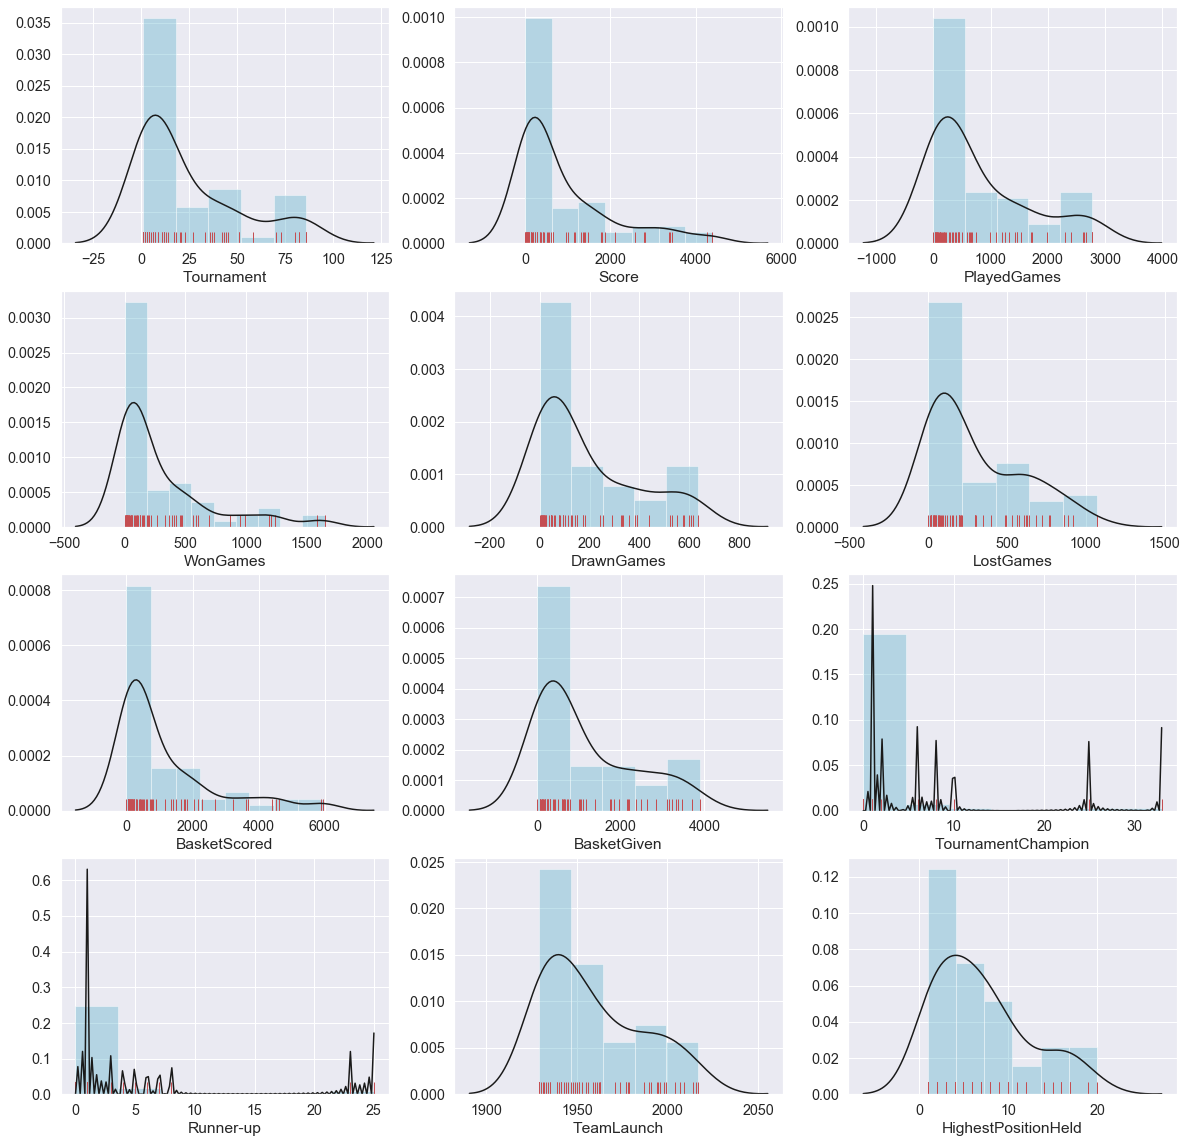

In [28]:
# Check for distribution skewness
attrs = ['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld']
plt.figure(figsize=(20,20))
index = 1
for col in basketball[attrs]:
    plt.subplot(4,3,index)
    sns.distplot(basketball[col], rug=True, kde=True,
                 rug_kws={"color": "r"},
                 kde_kws={"color": "k"},
                 hist_kws={"color": "c"})
    index += 1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

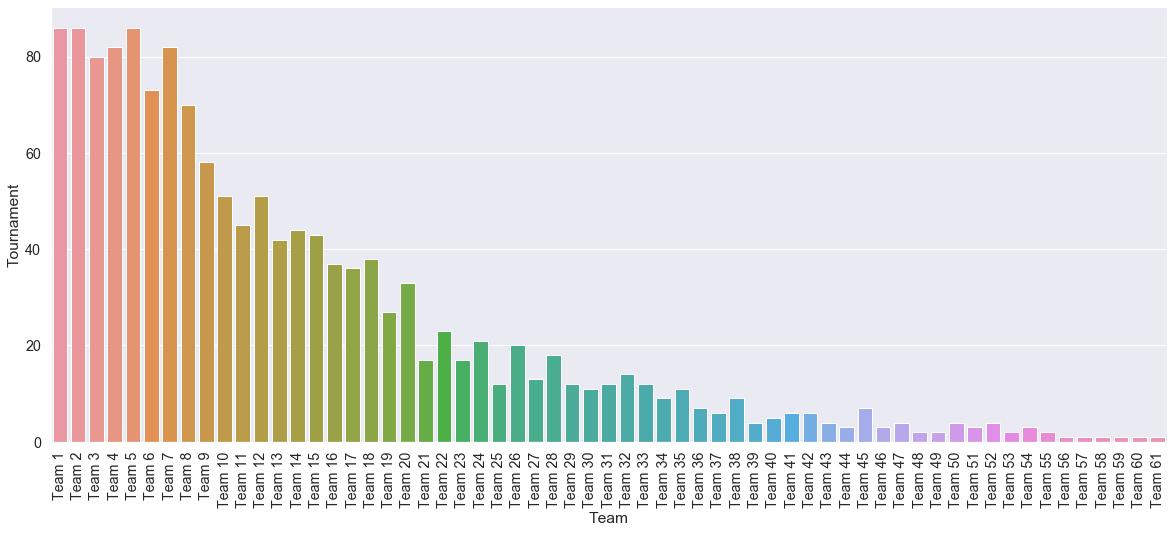

In [36]:
# No of tournaments played by teams
plt.figure(figsize=(20,8))
sns.barplot(basketball['Team'], basketball['Tournament'])
plt.xticks(rotation=90)

Text(0.5, 1.0, '# matches lost')

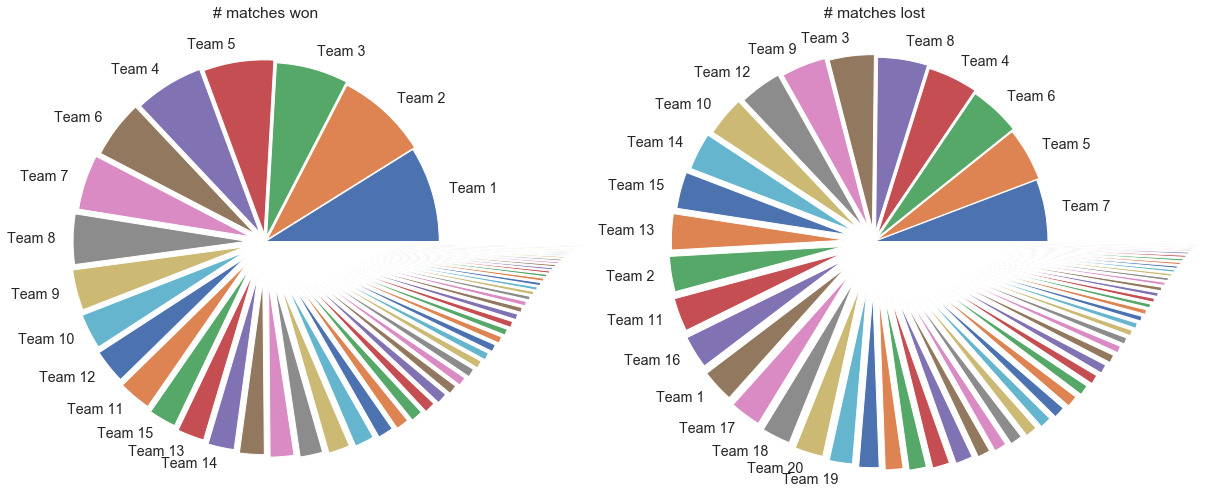

In [102]:
# No of matches won/lost by teams
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
bb = basketball[['Team','WonGames']].sort_values(by="WonGames", ascending=False)
plot = plt.pie(bb['WonGames'], labels=list(bb['Team'][:15]) + [str()] * (len(bb)-15), explode=[0.015*x for x in range(len(bb))])
plt.title('# matches won')
plt.subplot(1,2,2)
bb = basketball[['Team','LostGames']].sort_values(by="LostGames", ascending=False)
plot = plt.pie(bb['LostGames'], labels=list(bb['Team'][:20]) + [str()] * (len(bb)-20), explode=[0.015*x for x in range(len(bb))])
plt.title('# matches lost')

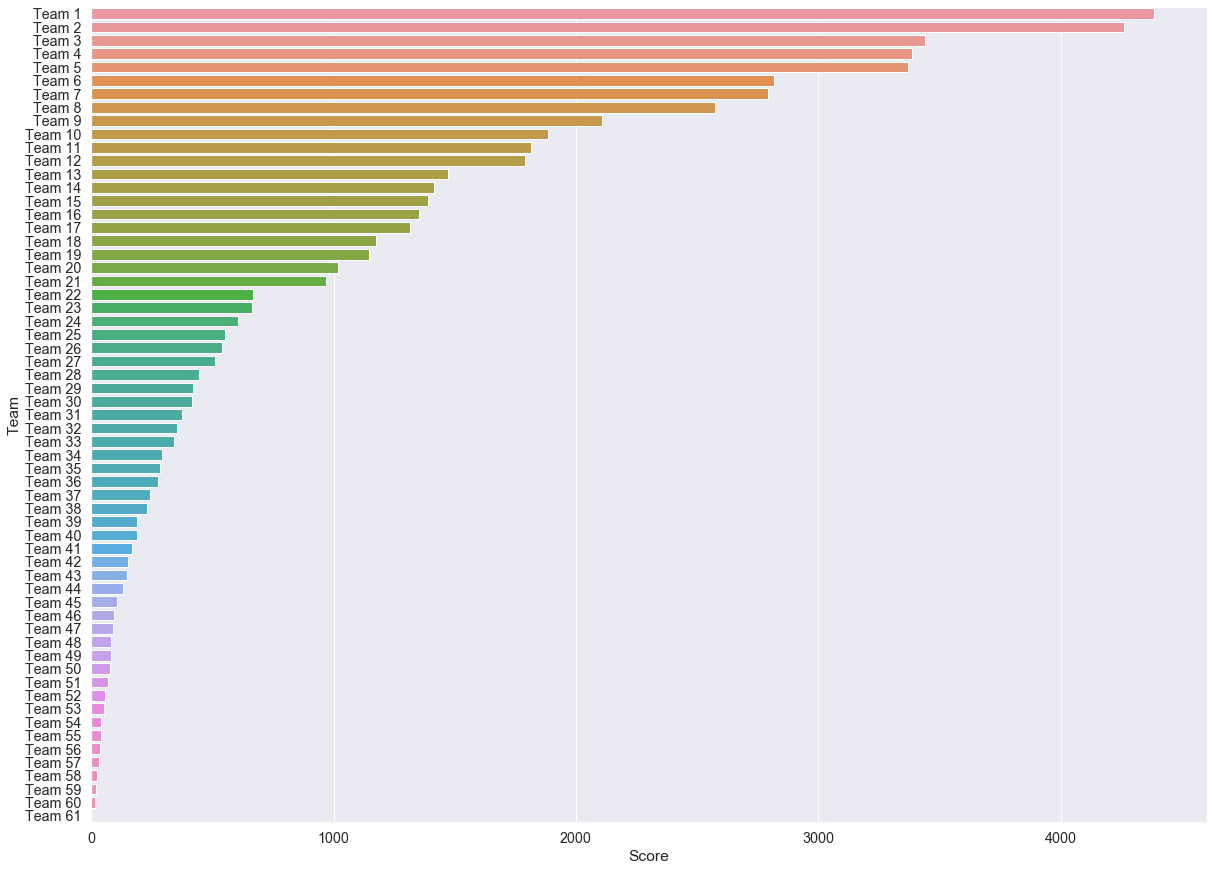

In [105]:
# Scores of the teams
plt.figure(figsize=(20,15))
sns.barplot(basketball['Score'], basketball['Team'], orient='h')

Text(0.5, 1.0, '# Baskets given')

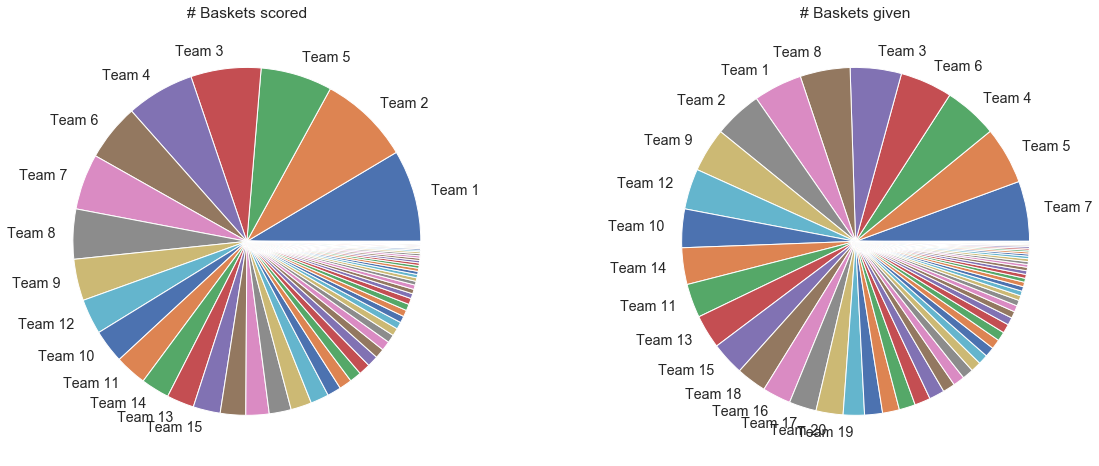

In [107]:
# No of baskets scored/given by teams
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
bb = basketball[['Team','BasketScored']].sort_values(by="BasketScored", ascending=False)
plot = plt.pie(bb['BasketScored'], labels=list(bb['Team'][:15]) + [str()] * (len(bb)-15))
plt.title('# Baskets scored')
plt.subplot(1,2,2)
bb = basketball[['Team','BasketGiven']].sort_values(by="BasketGiven", ascending=False)
plot = plt.pie(bb['BasketGiven'], labels=list(bb['Team'][:20]) + [str()] * (len(bb)-20))
plt.title('# Baskets given')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

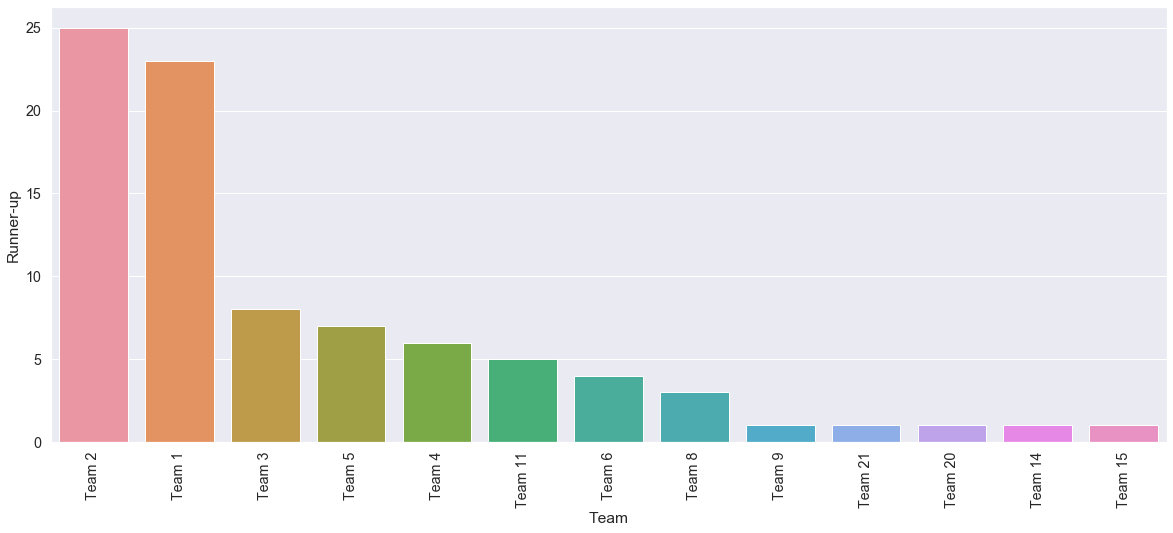

In [115]:
# The most runner-up
plt.figure(figsize=(20,8))
bb = basketball[['Team','Runner-up']].sort_values(by="Runner-up", ascending=False).where(lambda x: x["Runner-up"] > 0)
sns.barplot(bb['Team'], bb['Runner-up'])
plt.xticks(rotation=90)

**Observations**
- Histograms are a good graphical visualisation of the data by which we have a better understanding of the various features values distribution: for example we can understand what's the average score in teams.
- All attributes seems to be slightly right skewed except for ***TournamentChampion*** and ***Runner-up***.
- **Team 1**, **Team 2** and **Team 5** played the most tournament matches but Team 1 and Team 2 happens to be the highest average scorrer.
- **Team 3** despite of played less matches, have kept their position up in the leaderboard in compared to Team 4 and Team 5
- Performance of **Team 7** seems to be not very well since they are the ones have lost the most matches played and also have given the most baskets as well.
- **Team 1** seems to be a team with matured experience and game.
- **Team 2** also exhibit fine and profound game skills as they are the one appearing the most in the leaderboard as runner-up

#### Bivariate Analysis - Relationship between various features

#### Multivariate Analysis - Pairwise relatioship of all features

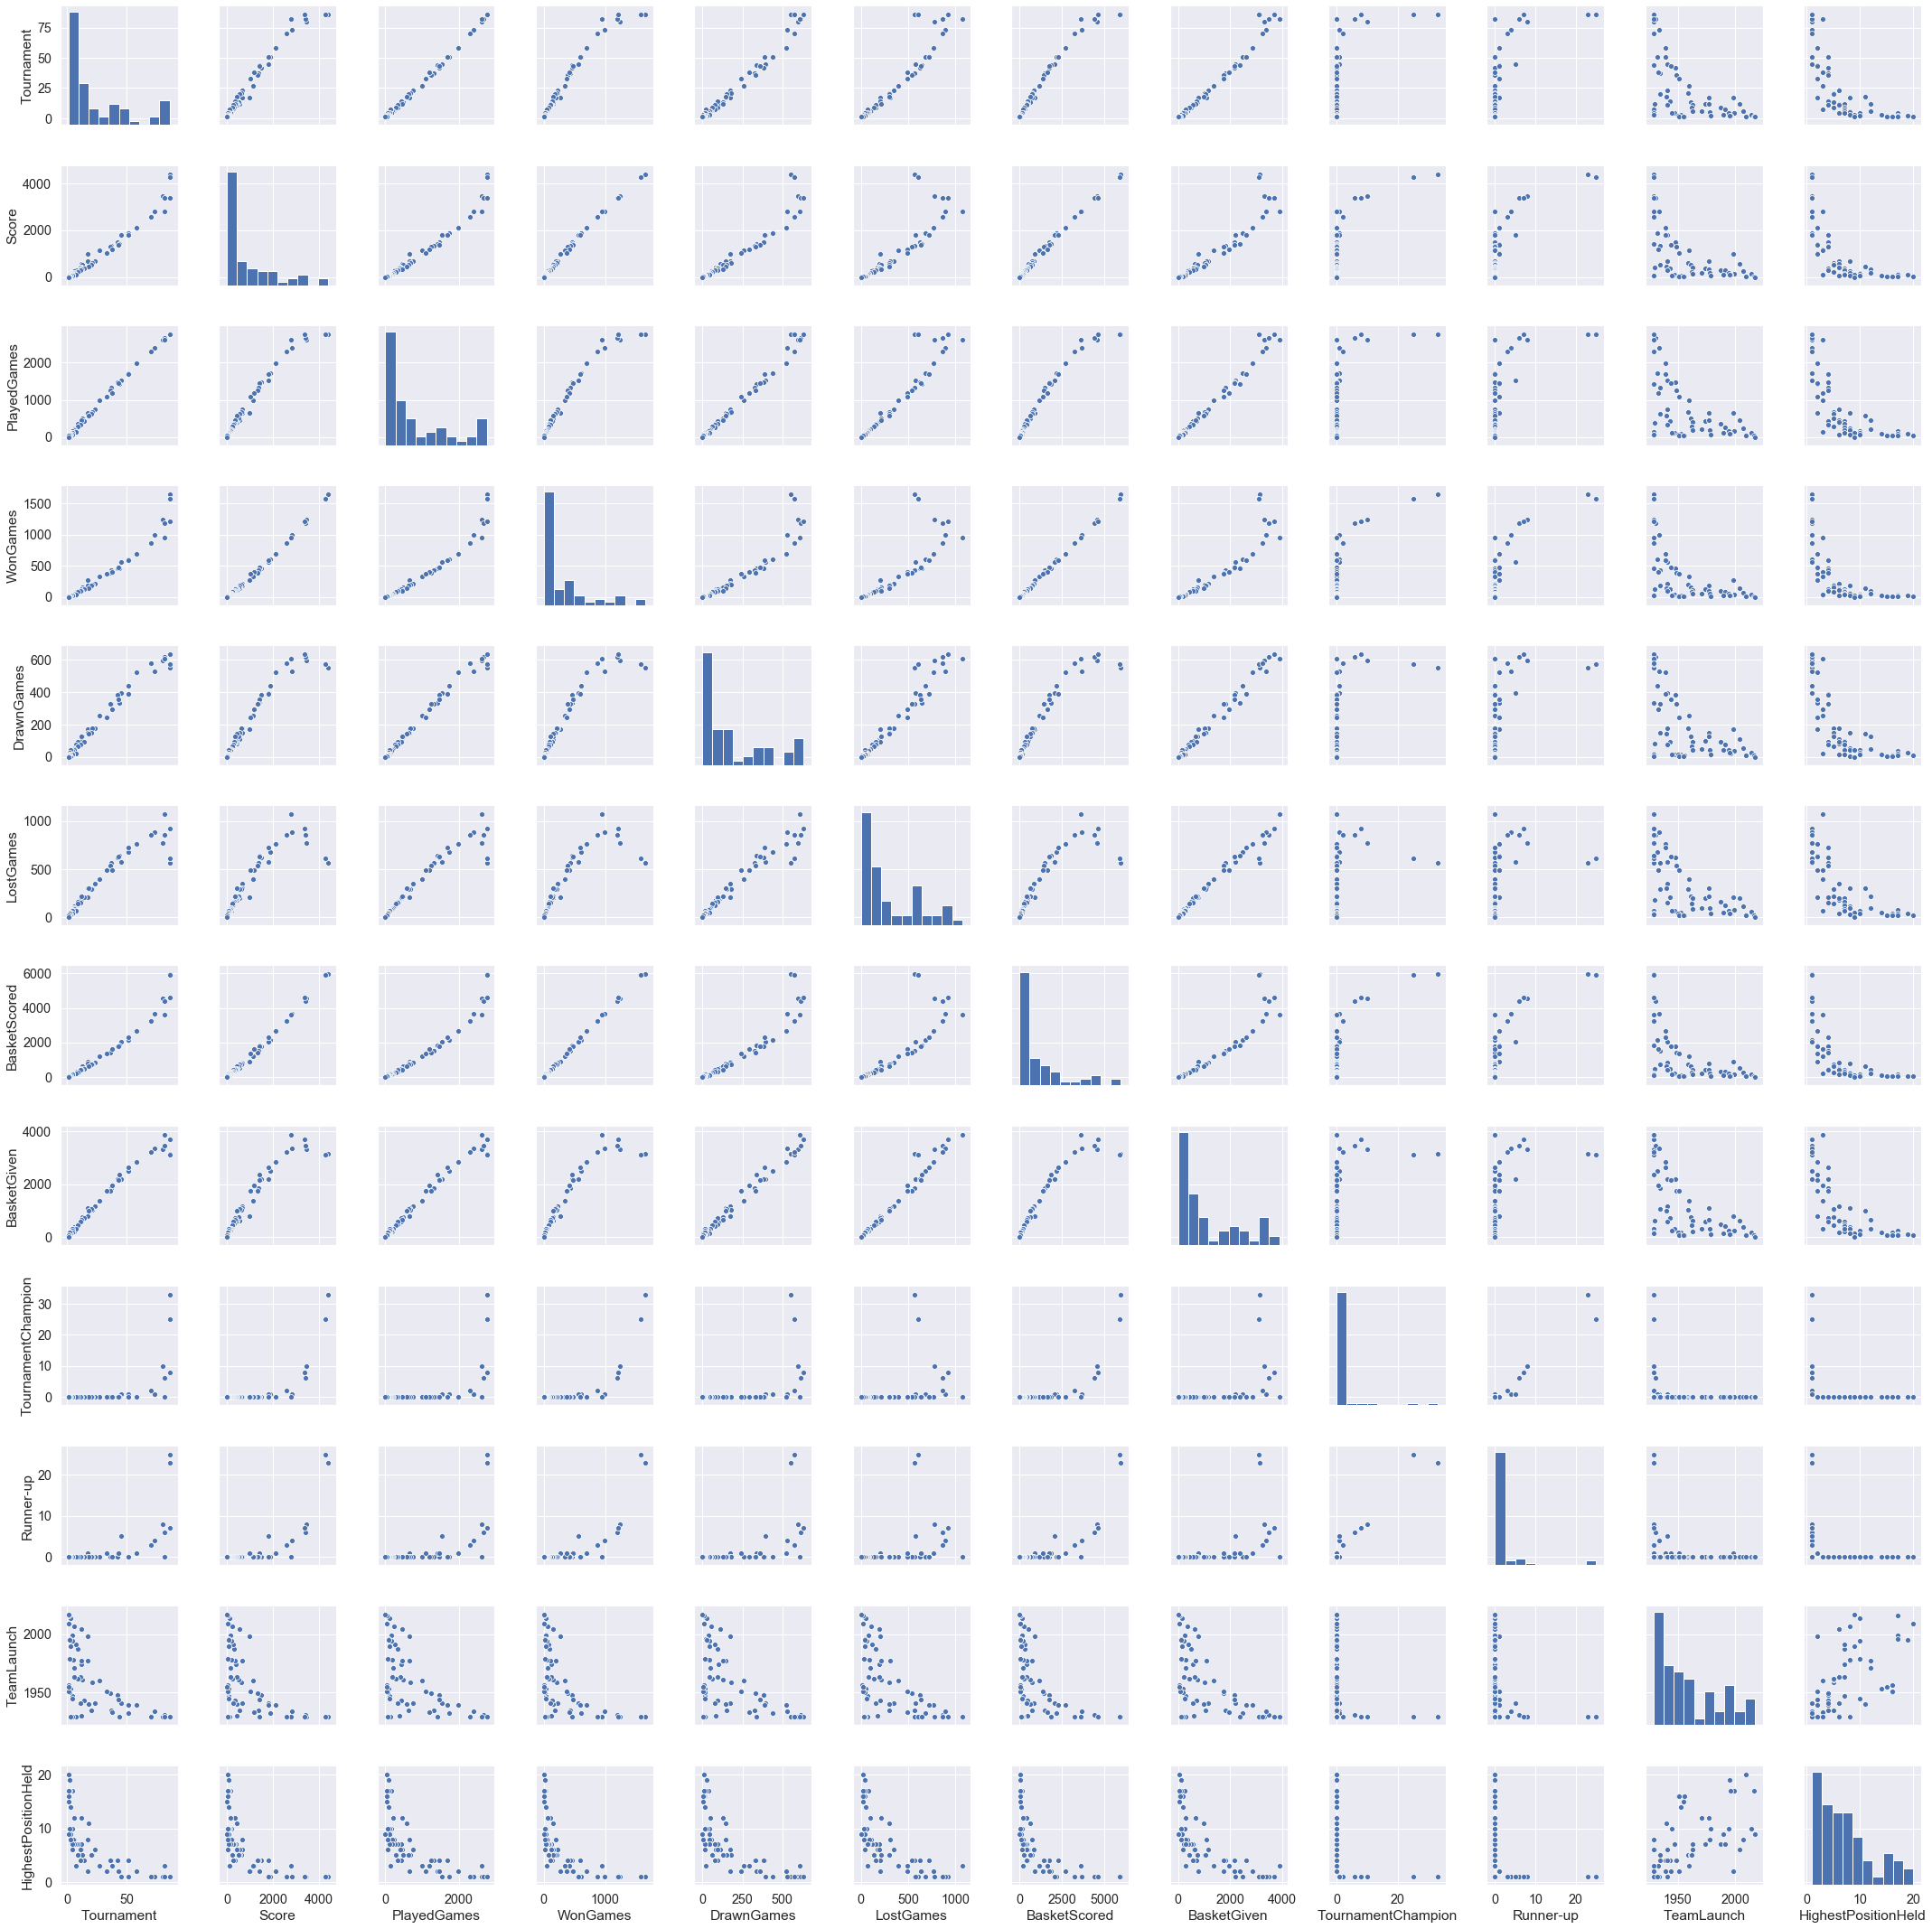

In [118]:
# Pairwise relationship
sns.pairplot(basketball[attrs])

**Comments**
Pair plot is built on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

**Observations**
- Attribiutes are lineraly related as shown in the Pairgrid except for TeamLaunch and highestPositionHeld.